# Задание 3

<div style="text-align: right"> 
    
    Домашнее задание III до 05/03/21 
    
    Широков Александр, ПМ-1701
    
    improfeo@yandex.ru
</div> 

Определим новый тип данных [*«префиксное дерево»*](https://ru.wikipedia.org/wiki/%D0%9F%D1%80%D0%B5%D1%84%D0%B8%D0%BA%D1%81%D0%BD%D0%BE%D0%B5_%D0%B4%D0%B5%D1%80%D0%B5%D0%B2%D0%BE) (Trie, бор). 

Словарь на основе префиксного дерева содержит пары **(ключ, значение)**, где ключом является слово, а значением - «словарная статья» - объект некоторого типа. 

Каждый узел дерева представляет собой пару из словарной статьи (её может и не быть!) и списка дуг, помеченных символом и узлом-потомком.

In [1]:
newtype Arc a = Arc (Char, Node a) -- узел дерева
newtype Node a = Node (Maybe a, [Arc a])

Словарь, содержащий три слова *“a”*, *“b”* и *“be”* (соответствующие им словарные стьти – это строки **“word a”**, **“word b”** и **“word be”**), может быть представлен следующим значением:

In [2]:
dictionary = Node (Nothing, [Arc ('a', Node (Just "word a", [])), 
                Arc ('b', Node (Just "word b", 
                           [Arc ('e', Node (Just "word be", []))]))])

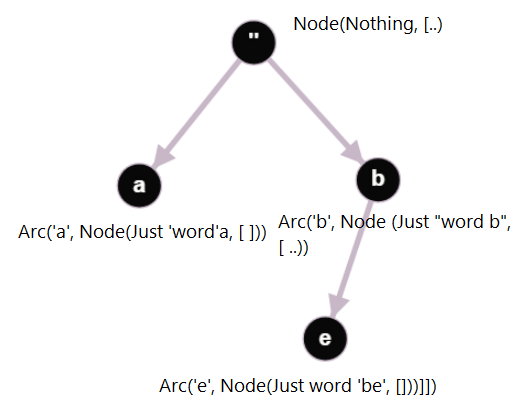

Будем работать с таким деревом, удобно для визуализации.

Пустое дерево будет представлено значением:

In [3]:
clearTree = Node (Nothing, [])

Написать две функции:

- ```haskell
getEntries :: Node a -> [(String, a)] 
```

    - выдает список пар (слово, словарная статья), содержащихся в дереве.
    


In [4]:
import Data.Maybe

In [5]:
getEntries :: Node a -> [(String, a)]
getEntries (Node (Nothing, [])) = [] -- пустое дерево
getEntries start = currentKey start "" -- начинаем с пустого ключа
currentKey :: Node a -> String -> [(String, a)]
currentKey  (Node (word, article)) k | isNothing word = concatMap (nextKey k) article
                                     | isJust word = (k, fromJust word) : concatMap (nextKey k) article --конкатенируем в список
nextKey :: String -> Arc a -> [(String, a)]
nextKey key (Arc (k, v)) = currentKey v (key ++ [k]) -- проходим вниз по дереву

Проверка функции `getEntries`:

In [6]:
getEntries dictionary

[("a","word a"),("b","word b"),("be","word be")]

In [7]:
getEntries clearTree

[]

- ```haskell
add :: (String, a) -> Node a -> Node a
```
    - должна добавлять слово со словарной статьёй в дерево

*Алгоритм*:

- Пусть дана пара из слова `Key` и словарной статьи `value`, которую нужно добавить. Будем спускаться из корня дерева на нижние уровни, каждый раз переходя в узел, чья метка совпадает с очередным символом ключа. После того как обработаны все символы ключа, узел, в котором остановился спуск и будет узлом, которому должно быть присвоено значение словарной статьи `value` (также, разумеется, узел должен быть помечен как имеющий значение). 

Напишем функцию, которая будет искать в списке потомков `[Arc]` очередной вершины `Arc` с нужным текущим ключом и возвращать True, если такой ключ есть.

In [27]:
haskey :: Char -> [Arc a] -> Bool
haskey t [] = False
haskey t (Arc (key, value):ls) | t == key = True
                               | otherwise = haskey t ls

А теперь напишем две функции, которые будут проверять на соответствие ключа дерева и в зависимости от этого сопоставлять различные значения и `Arc`. Если ключа нет, то значит мы добрались до верного узла и нужно аккуратно добавить в `Trie` значения

In [28]:
add :: (String, a) -> Node a -> Node a
add (x:ls, value) (Node (word, articles)) | haskey x articles = Node (word, map (isKey (x:ls, value)) articles)
                                          | otherwise = Node (word, Arc (x, Node (Just value, articles)):articles)

isKey :: (String, a) -> Arc a -> Arc a
isKey (x:ls, value) (Arc (key, v)) | x == key = Arc (key, add (ls, value) v)
                                   | otherwise = Arc (key, v)

Проверка функции `add`.

In [29]:
let y = add ("bec", "word bec") dictionary

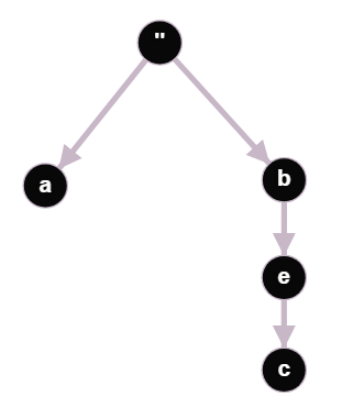

In [30]:
getEntries y

[("a","word a"),("b","word b"),("be","word be"),("bec","word bec")]

In [31]:
let d = add ("ab", "word ab") y

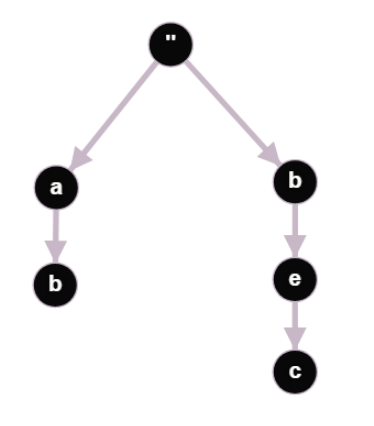

In [32]:
getEntries d

[("a","word a"),("ab","word ab"),("b","word b"),("be","word be"),("bec","word bec")]

На пустом дереве

In [33]:
let ct = add ("b", "word b") clearTree

In [34]:
getEntries ct

[("b","word b")]